# EPIC 3

- Als een key user wil ik voor een contact een lijst met toekomstige campagnes genereren volgens de waarschijnlijkheid dat ze zou inschrijven volgens vorige inschrijvingen, afspraken, eigenschappen van de contact zelf en zijn bedrijf, lookalikes etc.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import dotenv
from sqlalchemy import create_engine, text

dotenv.load_dotenv()

True

In [2]:
# Start db
def create_conn():
    driver = os.getenv("DB_DRIVER")
    server = os.getenv("DB_SERVER")
    database = os.getenv("DB_NAME")
    trusted_connection = os.getenv("DB_TRUSTED_CONNECTION")

    return create_engine(
        f"mssql+pyodbc://{server}/{database}?trusted_connection={trusted_connection}&driver={driver}"
    )


engine = create_conn()
# Test connection
connection = engine.connect()
res = connection.execute(text("SELECT @@version;")).fetchone()
connection.close()
res[0]

'Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) \n\tOct  8 2022 05:58:25 \n\tCopyright (C) 2022 Microsoft Corporation\n\tDeveloper Edition (64-bit) on Windows 10 Home 10.0 <X64> (Build 19045: ) (Hypervisor)\n'

## Get the data


In [3]:
SQL_LOCATION = os.getenv("EPIC_3_SQL_LOCATION")
SAVE_LOCATION = os.getenv("EPIC_3_SAVE_LOCATION")
query = open(SQL_LOCATION, "r").read()

df = pd.read_sql(query, engine)
df.drop_duplicates()
df.head()

,crm_campagne_naam,crm_campagne_naam_in_email,crm_campagne_type_campagne,crm_campagne_soort_campagne,crm_sessie_activiteitstype,crm_sessie_product,crm_sessie_thema_naam,crm_inschrijving_aanwezig_afwezig,crm_inschrijving_bron,crm_inschrijving_facturatie_bedrag,...,crm_account_status,crm_account_voka_nr,crm_financieledata_aantal_maanden,crm_financieledata_fte,crm_financieledata_gewijzigd_op,crm_financieledata_toegevoegde_waarde,crm_info_en_klachten_aanvraag,crm_info_en_klachten_status,crm_activiteitscode_naam,crm_activiteitscode_status
0,OV-P-Groep 288-PP.Develop-Plato 2019,OV-P-Groep 288-PP.Develop-Plato 2019,Project,Offline,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management,Aanwezig,Email,1200.0,...,Actief,77919,12,6.0,2021-07-16 09:58:07,562179.0,435A121C-1C55-E911-80FD-001DD8B72B61,Gesloten,Ijzer en staal,Actief
1,OV-P-Groep 288-PP.Develop-Plato 2019,OV-P-Groep 288-PP.Develop-Plato 2019,Project,Offline,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management,Aanwezig,Email,1200.0,...,Actief,77919,12,6.0,2021-07-16 09:58:07,562179.0,416D86BB-6E3A-E911-80FC-001DD8B72B61,Gesloten,Ijzer en staal,Actief
2,OV-P-Groep 288-PP.Develop-Plato 2019,OV-P-Groep 288-PP.Develop-Plato 2019,Project,Offline,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management,Aanwezig,Email,1200.0,...,Actief,77919,12,6.0,2021-07-16 09:58:07,562179.0,416D86BB-6E3A-E911-80FC-001DD8B72B61,Gesloten,Ijzer en staal,Actief
3,OV-P-Groep 288-PP.Develop-Plato 2019,OV-P-Groep 288-PP.Develop-Plato 2019,Project,Offline,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management,Aanwezig,Email,1200.0,...,Actief,77919,12,6.0,2021-07-16 09:58:07,562179.0,435A121C-1C55-E911-80FD-001DD8B72B61,Gesloten,Ijzer en staal,Actief
4,OV-P-Groep 288-PP.Develop-Plato 2019,OV-P-Groep 288-PP.Develop-Plato 2019,Project,Offline,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management,Aanwezig,Email,1200.0,...,Actief,77919,12,6.0,2021-07-16 09:58:07,562179.0,435A121C-1C55-E911-80FD-001DD8B72B61,Gesloten,Ijzer en staal,Actief


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58914 entries, 0 to 58913
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   crm_campagne_naam                                          58914 non-null  object        
 1   crm_campagne_naam_in_email                                 58914 non-null  object        
 2   crm_campagne_type_campagne                                 58914 non-null  object        
 3   crm_campagne_soort_campagne                                58914 non-null  object        
 4   crm_sessie_activiteitstype                                 57884 non-null  object        
 5   crm_sessie_product                                         57890 non-null  object        
 6   crm_sessie_thema_naam                                      57884 non-null  object        
 7   crm_inschrijving_aanwezig_afwez

# Clean the data


## Remove unnessessary columns


In [5]:
df.columns

Index(['crm_campagne_naam', 'crm_campagne_naam_in_email',
       'crm_campagne_type_campagne', 'crm_campagne_soort_campagne',
       'crm_sessie_activiteitstype', 'crm_sessie_product',
       'crm_sessie_thema_naam', 'crm_inschrijving_aanwezig_afwezig',
       'crm_inschrijving_bron', 'crm_inschrijving_facturatie_bedrag',
       'crm_contact_functietitel', 'crm_contact_status',
       'crm_contact_voka_medewerker',
       'crm_persoon_mail_regio_antwerpen_waasland',
       'crm_persoon_mail_regio_brussel_hoofdstedelijk_gewest',
       'crm_persoon_mail_regio_limburg',
       'crm_persoon_mail_regio_mechelen_kempen',
       'crm_persoon_mail_regio_oost_vlaanderen',
       'crm_persoon_mail_regio_vlaams_brabant',
       'crm_persoon_mail_regio_voka_nationaal',
       'crm_persoon_mail_regio_west_vlaanderen',
       'crm_persoon_mail_thema_duurzaamheid',
       'crm_persoon_mail_thema_financieel_fiscaal',
       'crm_persoon_mail_thema_innovatie',
       'crm_persoon_mail_thema_internatio

In [6]:
"""
['crm_campagne_naam', 'crm_campagne_naam_in_email',
       'crm_campagne_type_campagne', 'crm_campagne_soort_campagne', -> Done
       'crm_sessie_activiteitstype', 'crm_sessie_product', -> 
       'crm_sessie_thema_naam', 'crm_inschrijving_aanwezig_afwezig',
       'crm_inschrijving_bron', 'crm_inschrijving_facturatie_bedrag',
       'crm_contact_functietitel', 'crm_contact_status',
       'crm_contact_voka_medewerker',
       'crm_persoon_mail_regio_antwerpen_waasland',
       'crm_persoon_mail_regio_brussel_hoofdstedelijk_gewest',
       'crm_persoon_mail_regio_limburg',
       'crm_persoon_mail_regio_mechelen_kempen',
       'crm_persoon_mail_regio_oost_vlaanderen',
       'crm_persoon_mail_regio_vlaams_brabant',
       'crm_persoon_mail_regio_voka_nationaal',
       'crm_persoon_mail_regio_west_vlaanderen',
       'crm_persoon_mail_thema_duurzaamheid',
       'crm_persoon_mail_thema_financieel_fiscaal',
       'crm_persoon_mail_thema_innovatie',
       'crm_persoon_mail_thema_internationaal_ondernemen',
       'crm_persoon_mail_thema_mobiliteit', 'crm_persoon_mail_thema_omgeving',
       'crm_persoon_mail_thema_sales_marketing_communicatie',
       'crm_persoon_mail_thema_strategie_en_algemeen_management',
       'crm_Persoon_Mail_thema_talent', 'crm_persoon_mail_thema_welzijn',
       'crm_persoon_mail_type_bevraging',
       'crm_persoon_mail_type_communities_en_projecten',
       'crm_persoon_mail_type_netwerkevenementen',
       'crm_persoon_mail_type_nieuwsbrieven',
       'crm_persoon_mail_type_opleidingen',
       'crm_persoon_mail_type_persberichten_belangrijke_meldingen',
       'crm_persoon_marketingcommunicatie', 'crm_persoon_persoonsnr',
       'crm_persoon_reden_van_status', 'crm_account_adres_geografische_regio',
       'crm_account_adres_geografische_subregio', 'crm_account_adres_land',
       'crm_account_adres_plaats', 'crm_account_adres_postcode',
       'crm_account_adres_provincie', 'crm_account_industriezone_naam',
       'crm_account_is_voka_entiteit', 'crm_account_ondernemingsaard',
       'crm_account_ondernemingstype', 'crm_account_primaire_activiteit',
       'crm_account_reden_van_status', 'crm_account_status',
       'crm_account_voka_nr', 'crm_financieledata_aantal_maanden',
    'crm_financieledata_fte',
       'crm_financieledata_gewijzigd_op',
       'crm_financieledata_toegevoegde_waarde',
       'crm_activiteitscode_naam', 'crm_activiteitscode_status']
"""
y_columns = [
    'crm_campagne_type_campagne',
    'crm_campagne_soort_campagne',
]

y_columns_bis = [
    'crm_sessie_activiteitstype',
    'crm_sessie_product',
    'crm_sessie_thema_naam',
    
]

x_columns = [
    # Contact
    'crm_contact_functietitel',
    'crm_contact_status',
    'crm_contact_voka_medewerker',
    # Persoon
    'crm_persoon_mail_thema_duurzaamheid',
    'crm_persoon_mail_thema_financieel_fiscaal',
    'crm_persoon_mail_thema_innovatie',
    'crm_persoon_mail_thema_internationaal_ondernemen',
    'crm_persoon_mail_thema_mobiliteit', 'crm_persoon_mail_thema_omgeving',
    'crm_persoon_mail_thema_sales_marketing_communicatie',
    'crm_persoon_mail_thema_strategie_en_algemeen_management',
    'crm_Persoon_Mail_thema_talent', 'crm_persoon_mail_thema_welzijn',
    'crm_persoon_mail_type_bevraging',
    'crm_persoon_mail_type_communities_en_projecten',
    'crm_persoon_mail_type_netwerkevenementen',
    'crm_persoon_mail_type_nieuwsbrieven',
    'crm_persoon_mail_type_opleidingen',
    'crm_persoon_mail_type_persberichten_belangrijke_meldingen',
    'crm_persoon_marketingcommunicatie',
    # Account
    'crm_account_adres_geografische_regio',
    'crm_account_adres_geografische_subregio', 'crm_account_adres_land',
    'crm_account_adres_plaats', 'crm_account_adres_postcode',
    'crm_account_adres_provincie', 'crm_account_industriezone_naam',
    'crm_account_is_voka_entiteit', 'crm_account_ondernemingsaard',
    'crm_account_ondernemingstype', 'crm_account_primaire_activiteit','crm_account_status', 'crm_financieledata_fte',
           'crm_financieledata_toegevoegde_waarde','crm_activiteitscode_naam', 'crm_activiteitscode_status'

]

In [7]:
y_df = df[y_columns]
y_df

,crm_campagne_type_campagne,crm_campagne_soort_campagne
0,Project,Offline
1,Project,Offline
2,Project,Offline
3,Project,Offline
4,Project,Offline
...,...,...
58909,Netwerkevenement,Offline
58910,Netwerkevenement,Offline
58911,Netwerkevenement,Offline
58912,Project,On en Offline


In [8]:
y_df_bis = df[y_columns_bis]
y_df_bis

,crm_sessie_activiteitstype,crm_sessie_product,crm_sessie_thema_naam
0,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management
1,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management
2,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management
3,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management
4,GR Plato sessies,OV-Opleidingen-LLT,Algemeen Management
...,...,...,...
58909,NW Voka Connect Dendermonde,OV-Netwerkactiviteit-provinciaal,Netwerking
58910,BB Regiowerking Dendermonde,OV-Deelname Netwerkactiviteiten,Netwerking
58911,BB Regiowerking Dendermonde,OV-Deelname Netwerkactiviteiten,Netwerking
58912,AO Welt,WELT,Welt


In [9]:
x_df = df[x_columns]
x_df

,crm_contact_functietitel,crm_contact_status,crm_contact_voka_medewerker,crm_persoon_mail_thema_duurzaamheid,crm_persoon_mail_thema_financieel_fiscaal,crm_persoon_mail_thema_innovatie,crm_persoon_mail_thema_internationaal_ondernemen,crm_persoon_mail_thema_mobiliteit,crm_persoon_mail_thema_omgeving,crm_persoon_mail_thema_sales_marketing_communicatie,...,crm_account_industriezone_naam,crm_account_is_voka_entiteit,crm_account_ondernemingsaard,crm_account_ondernemingstype,crm_account_primaire_activiteit,crm_account_status,crm_financieledata_fte,crm_financieledata_toegevoegde_waarde,crm_activiteitscode_naam,crm_activiteitscode_status
0,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9030) R 4 Industrieweg Wondelgem - Maria...,Nee,Diensten,Bedrijf,Ijzer en staal,Actief,6.0,562179.0,Ijzer en staal,Actief
1,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9030) R 4 Industrieweg Wondelgem - Maria...,Nee,Diensten,Bedrijf,Ijzer en staal,Actief,6.0,562179.0,Ijzer en staal,Actief
2,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9030) R 4 Industrieweg Wondelgem - Maria...,Nee,Diensten,Bedrijf,Ijzer en staal,Actief,6.0,562179.0,Ijzer en staal,Actief
3,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9030) R 4 Industrieweg Wondelgem - Maria...,Nee,Diensten,Bedrijf,Ijzer en staal,Actief,6.0,562179.0,Ijzer en staal,Actief
4,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9030) R 4 Industrieweg Wondelgem - Maria...,Nee,Diensten,Bedrijf,Ijzer en staal,Actief,6.0,562179.0,Ijzer en staal,Actief
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58909,Business Development Manager,Inactief,0,Ja,Nee,Ja,Nee,Nee,Nee,Nee,...,OV - (9240) Wijnveld,Nee,Productie,Bedrijf,Ijzer en staal,Actief,28.0,2627561.0,Ijzer en staal,Actief
58910,CEO,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9240) Wijnveld,Nee,Productie,Bedrijf,Ijzer en staal,Actief,26.0,2166179.0,Ijzer en staal,Actief
58911,CEO,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,OV - (9240) Wijnveld,Nee,Productie,Bedrijf,Ijzer en staal,Actief,28.0,2667063.0,Ijzer en staal,Actief
58912,Zaakvoerder,Actief,0,Nee,Nee,Nee,Nee,Nee,Nee,Nee,...,None,Nee,Diensten,Bedrijf,Telecom & IT,Actief,22.0,1294080.0,Telecom & IT,Actief


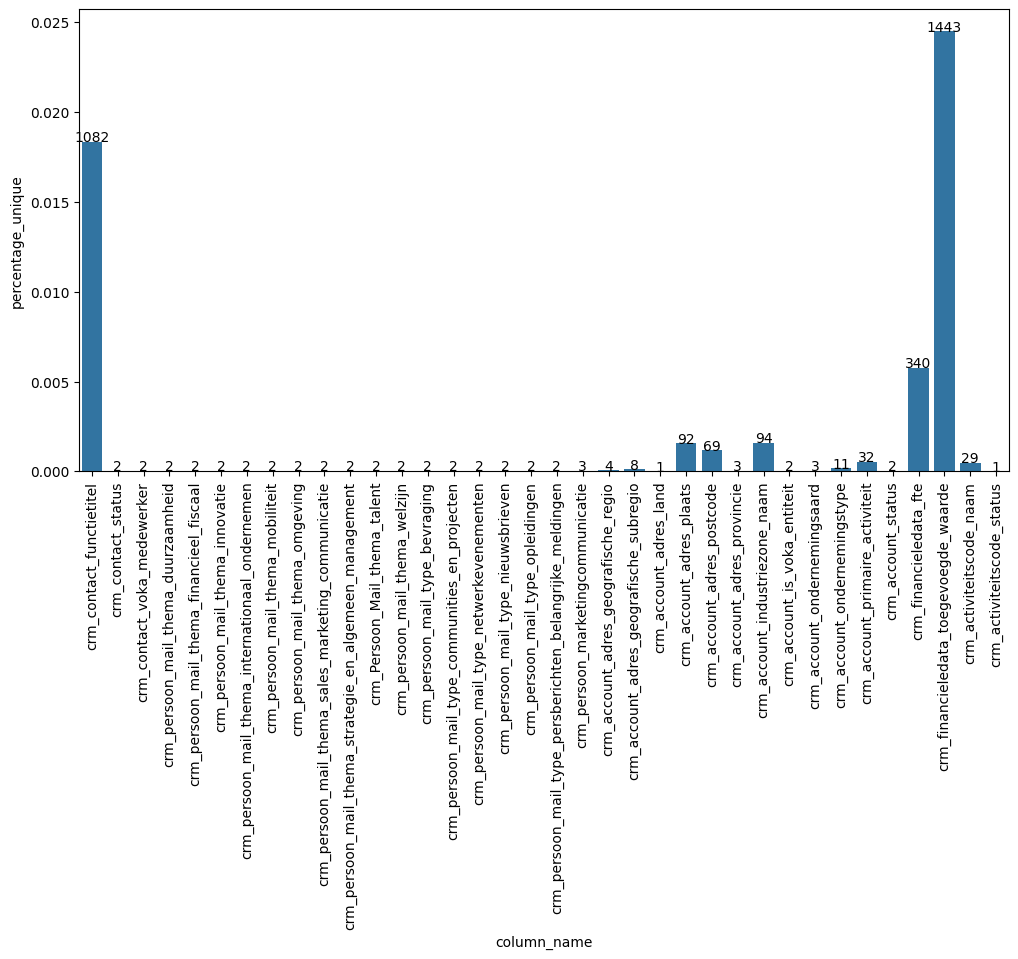

In [10]:
# For the X_data: Count the nuber of unique values per column and pass it to a dataframe
x_df_unique = pd.DataFrame(x_df.nunique()).reset_index()
x_df_unique.columns = ['column_name', 'unique_count']
# Add a column with the percentage of unique values
x_df_unique['percentage_unique'] = x_df_unique['unique_count'] / len(x_df)
# Plot the information
plt.figure(figsize=(12, 6))
sns.barplot(x='column_name', y='percentage_unique', data=x_df_unique)
# Add the actual count of unique values on top of the bars
for i, row in x_df_unique.iterrows():
    plt.text(row.name, row.percentage_unique, row.unique_count, color='black', ha="center")
plt.xticks(rotation=90)
plt.show()

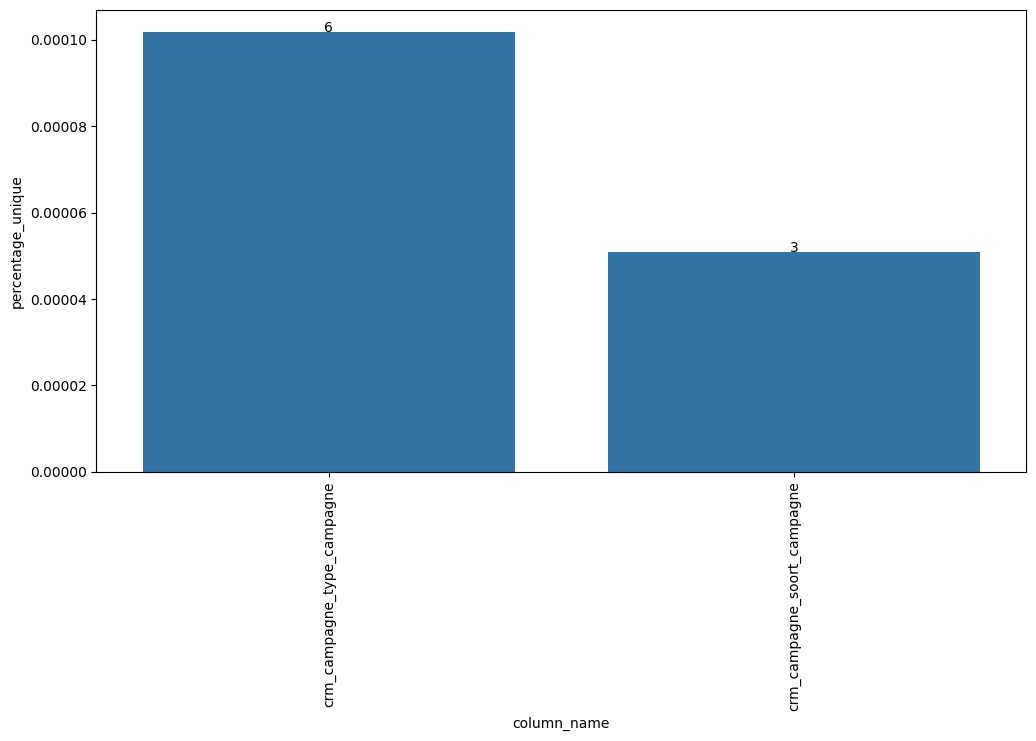

In [11]:
# For the Y_data: Count the nuber of unique values per column and pass it to a dataframe
y_df_unique = pd.DataFrame(y_df.nunique()).reset_index()
y_df_unique.columns = ['column_name', 'unique_count']
# Add a column with the percentage of unique values
y_df_unique['percentage_unique'] = y_df_unique['unique_count'] / len(y_df)
# Plot the information
plt.figure(figsize=(12, 6))
sns.barplot(x='column_name', y='percentage_unique', data=y_df_unique)
# Add the actual count of unique values on top of the bars
for i, row in y_df_unique.iterrows():
    plt.text(row.name, row.percentage_unique, row.unique_count, color='black', ha="center")
plt.xticks(rotation=90)
plt.show()

In [12]:
x_df.columns

Index(['crm_contact_functietitel', 'crm_contact_status',
       'crm_contact_voka_medewerker', 'crm_persoon_mail_thema_duurzaamheid',
       'crm_persoon_mail_thema_financieel_fiscaal',
       'crm_persoon_mail_thema_innovatie',
       'crm_persoon_mail_thema_internationaal_ondernemen',
       'crm_persoon_mail_thema_mobiliteit', 'crm_persoon_mail_thema_omgeving',
       'crm_persoon_mail_thema_sales_marketing_communicatie',
       'crm_persoon_mail_thema_strategie_en_algemeen_management',
       'crm_Persoon_Mail_thema_talent', 'crm_persoon_mail_thema_welzijn',
       'crm_persoon_mail_type_bevraging',
       'crm_persoon_mail_type_communities_en_projecten',
       'crm_persoon_mail_type_netwerkevenementen',
       'crm_persoon_mail_type_nieuwsbrieven',
       'crm_persoon_mail_type_opleidingen',
       'crm_persoon_mail_type_persberichten_belangrijke_meldingen',
       'crm_persoon_marketingcommunicatie',
       'crm_account_adres_geografische_regio',
       'crm_account_adres_geogra

## Process the data

In [13]:


# Categorize the x columns
categories = {
    "adres": [
        "crm_account_adres_geografische_regio",
        "crm_account_adres_geografische_subregio",
        "crm_account_adres_land",
        "crm_account_adres_plaats",
        "crm_account_adres_postcode",
        "crm_account_adres_provincie",
    ],
    "industrie_activiteit": [
        "crm_account_industriezone_naam",
        "crm_account_ondernemingsaard",
        "crm_account_ondernemingstype",
        "crm_account_primaire_activiteit",
        "crm_activiteitscode_naam",
        "crm_activiteitscode_status"],
    "voka_relatie": [
        "crm_account_is_voka_entiteit",
        "crm_account_status",
        "crm_contact_voka_medewerker",
         'crm_contact_status',
    ],
    "account_contact": [
        "crm_contact_functietitel"
    ],
    "financieel": [
        "crm_financieledata_toegevoegde_waarde",
        'crm_financieledata_fte', 
    ],
    "mail_thema": [
        'crm_persoon_mail_thema_duurzaamheid',
       'crm_persoon_mail_thema_financieel_fiscaal',
       'crm_persoon_mail_thema_innovatie',
       'crm_persoon_mail_thema_internationaal_ondernemen',
       'crm_persoon_mail_thema_mobiliteit', 
       'crm_persoon_mail_thema_omgeving',
       'crm_persoon_mail_thema_sales_marketing_communicatie',
       'crm_persoon_mail_thema_strategie_en_algemeen_management',
       'crm_Persoon_Mail_thema_talent', 
       'crm_persoon_mail_thema_welzijn',
       'crm_persoon_mail_type_bevraging',
       'crm_persoon_mail_type_communities_en_projecten',
       'crm_persoon_mail_type_netwerkevenementen',
       'crm_persoon_mail_type_nieuwsbrieven',
       'crm_persoon_mail_type_opleidingen',
       'crm_persoon_mail_type_persberichten_belangrijke_meldingen',
       'crm_persoon_marketingcommunicatie',
       ],
}

In [14]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58914 entries, 0 to 58913
Data columns (total 36 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   crm_contact_functietitel                                   57083 non-null  object 
 1   crm_contact_status                                         58914 non-null  object 
 2   crm_contact_voka_medewerker                                58914 non-null  object 
 3   crm_persoon_mail_thema_duurzaamheid                        58914 non-null  object 
 4   crm_persoon_mail_thema_financieel_fiscaal                  58914 non-null  object 
 5   crm_persoon_mail_thema_innovatie                           58914 non-null  object 
 6   crm_persoon_mail_thema_internationaal_ondernemen           58914 non-null  object 
 7   crm_persoon_mail_thema_mobiliteit                          58914 non-null  object 
 8   crm_pe

In [15]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58914 entries, 0 to 58913
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   crm_campagne_type_campagne   58914 non-null  object
 1   crm_campagne_soort_campagne  58914 non-null  object
dtypes: object(2)
memory usage: 920.7+ KB


In [16]:
# Split the y_df into two dataframes
y_df_campagne = y_df[y_columns[:1]]
y_df_campagne

,crm_campagne_type_campagne
0,Project
1,Project
2,Project
3,Project
4,Project
...,...
58909,Netwerkevenement
58910,Netwerkevenement
58911,Netwerkevenement
58912,Project


In [17]:
# Preprocess the data
from sklearn.preprocessing import OneHotEncoder

# One hot encode the y_df_campagne
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_df_campagne)
y_df_campagne = enc.transform(y_df_campagne).toarray()
y_df_campagne

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

# 

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Based on unique values, decide what to do with the columns
single_cols = [] # 1 unique value

for col in x_df.columns:
    if len(x_df[col].unique()) == 1:
        single_cols.append(col)
# Remove the single columns from the df
x_df = x_df.drop(columns=single_cols)
df_objects = x_df.select_dtypes(include="object")

# Label encode the columns
label_encoder = LabelEncoder()
for col in df_objects.columns:
    x_df[col] = label_encoder.fit_transform(x_df[col])

# Assert that all columns are numeric or float
assert x_df.select_dtypes(include="object").shape[1] == 0

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x_df)
x_df = imp.transform(x_df)

assert np.isnan(x_df).sum() == 0
x_df

array([[1.008000e+03, 0.000000e+00, 0.000000e+00, ..., 6.000000e+00,
        5.621790e+05, 1.600000e+01],
       [1.008000e+03, 0.000000e+00, 0.000000e+00, ..., 6.000000e+00,
        5.621790e+05, 1.600000e+01],
       [1.008000e+03, 0.000000e+00, 0.000000e+00, ..., 6.000000e+00,
        5.621790e+05, 1.600000e+01],
       ...,
       [1.250000e+02, 0.000000e+00, 0.000000e+00, ..., 2.800000e+01,
        2.667063e+06, 1.600000e+01],
       [1.008000e+03, 0.000000e+00, 0.000000e+00, ..., 2.200000e+01,
        1.294080e+06, 2.200000e+01],
       [1.008000e+03, 0.000000e+00, 0.000000e+00, ..., 2.200000e+01,
        1.294080e+06, 2.200000e+01]])

In [19]:
# Save the label encoder
import pickle

with open(os.path.join(SAVE_LOCATION, "label_encoder_x.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

In [20]:
# Creating a test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_df, y_df_campagne, test_size=0.1, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53022, 34), (1179, 34), (53022, 6), (1179, 6))

In [21]:
# Scale the data using a min max scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
# Save the scaler
with open(os.path.join(SAVE_LOCATION, "scaler_x.pkl"), "wb") as f:
    pickle.dump(scaler, f)

In [22]:
X_train, y_train

(array([[ 0.215019  ,  2.66921933, -0.0336584 , ..., -0.30801339,
         -0.34389313,  0.88371293],
        [ 0.31187543, -0.37464137, -0.0336584 , ...,  0.1334467 ,
          0.41248842, -1.60279803],
        [-0.48416336, -0.37464137, -0.0336584 , ...,  0.06517967,
          0.70384692, -1.60279803],
        ...,
        [-0.27531668, -0.37464137, -0.0336584 , ..., -0.23291966,
         -0.2447325 ,  0.46929444],
        [-0.33887871, -0.37464137, -0.0336584 , ..., -0.15099923,
         -0.11043538,  0.46929444],
        [ 1.00803103, -0.37464137, -0.0336584 , ...,  1.01978022,
          1.3224275 ,  1.57441042]]),
 array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.]]))

In [23]:
# Make sure there are no NaN values
assert np.isnan(X_train).any() == False
assert np.isnan(X_test).any() == False

In [24]:
# Create a model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='RMSprop',
                loss=CategoricalCrossentropy(),
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4480      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 15014 (58.65 KB)
Trainable params: 15014 (58.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
epochs = 500
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=int(epochs/20),
    restore_best_weights=True,
)

hist = model.fit(X_train, y_train, epochs=500, batch_size=256, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/500
208/208 [==============================] - 1s 2ms/step - loss: 1.1745 - accuracy: 0.5145 - val_loss: 1.0886 - val_accuracy: 0.5655
Epoch 2/500
208/208 [==============================] - 0s 1ms/step - loss: 1.0401 - accuracy: 0.5831 - val_loss: 1.0381 - val_accuracy: 0.5826
Epoch 3/500
208/208 [==============================] - 0s 1ms/step - loss: 0.9939 - accuracy: 0.6035 - val_loss: 1.0298 - val_accuracy: 0.5786
Epoch 4/500
208/208 [==============================] - 0s 1ms/step - loss: 0.9645 - accuracy: 0.6148 - val_loss: 1.0192 - val_accuracy: 0.5816
Epoch 5/500
208/208 [==============================] - 0s 1ms/step - loss: 0.9438 - accuracy: 0.6257 - val_loss: 0.9610 - val_accuracy: 0.6132
Epoch 6/500
208/208 [==============================] - 0s 1ms/step - loss: 0.9238 - accuracy: 0.6355 - val_loss: 0.9779 - val_accuracy: 0.6056
Epoch 7/500
208/208 [==============================] - 0s 1ms/step - loss: 0.9065 - accuracy: 0.6393 - val_loss: 1.0324 - val_accuracy: 0.5536

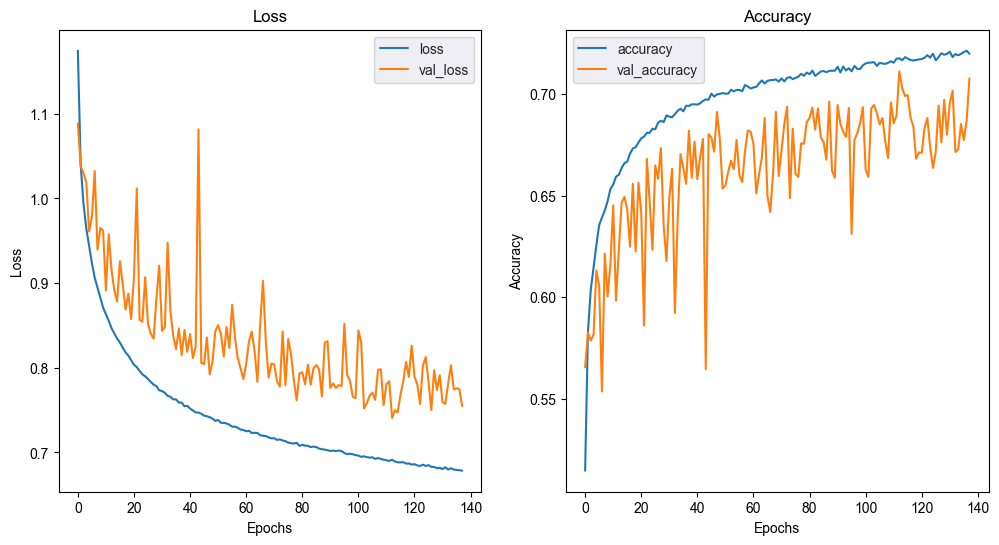

In [26]:
# Plot the loss
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x=range(len(hist.history['loss'])), y=hist.history['loss'], label='loss', ax=ax[0])
sns.lineplot(x=range(len(hist.history['val_loss'])), y=hist.history['val_loss'], label='val_loss', ax=ax[0])

ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

sns.lineplot(x=range(len(hist.history['accuracy'])), y=hist.history['accuracy'], label='accuracy', ax=ax[1])
sns.lineplot(x=range(len(hist.history['val_accuracy'])), y=hist.history['val_accuracy'], label='val_accuracy', ax=ax[1])

ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()

37/37 [==============================] - 0s 722us/step


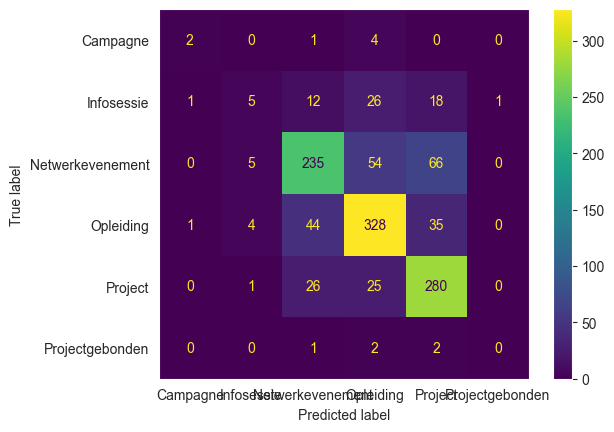

In [33]:
# Evaluate the model
results = model.evaluate(X_test, y_test)

# Visualize the results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_a = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_a, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
# Disable the grid
disp.plot(values_format="d")
plt.grid(False)
plt.show()